In [14]:
import qiskit
from minimum import MinimumQClassifier
from dataset import ProcessData
from general_preparation import QClassifier
from qiskit.visualization import plot_histogram
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
import numpy as np
IBMQ.save_account('82728111db036a818925c52fbbc084bff7e50f2ab2b5d46e6921b52eb1094c8b76b36e0be857f2c2c41ed860ee53d664793b006c7ac7541fb36d067061387542',overwrite=True)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
dataexp = ProcessData()

In [4]:
mini = MinimumQClassifier()

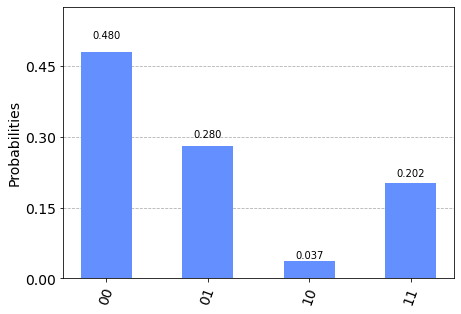

In [5]:
backend = qiskit.Aer.get_backend('qasm_simulator')
results = qiskit.execute(mini.circuito, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [6]:
qclass = QClassifier(np.append(dataexp.norm[0:32,:],dataexp.norm[55:87,:]).reshape(64,2),np.append(dataexp.Y[0:32],dataexp.Y[55:87]), dataexp.norm[32,:])
qclass.preparation()

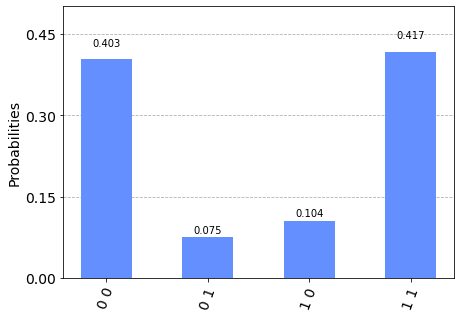

In [7]:
backend = qiskit.Aer.get_backend('qasm_simulator')
results = qiskit.execute(qclass.circuito, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [8]:
qclass = QClassifier(np.append(dataexp.norm[0:32,:],dataexp.norm[55:87,:]).reshape(64,2),np.append(dataexp.Y[0:32],dataexp.Y[55:87]), dataexp.norm[54,:])
qclass.preparation()

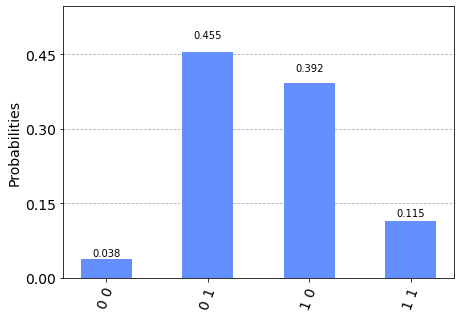

In [9]:
backend = qiskit.Aer.get_backend('qasm_simulator')
results = qiskit.execute(qclass.circuito, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [17]:
provider = qiskit.IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and not x.configuration().simulator and x.status().operational==True))
job = qiskit.execute(mini.circuito, backend=backend, shots=1024, optimization_level=3)
job_monitor(job, interval = 2)

ibmqfactory.load_account:WARNING:2020-11-23 21:47:42,220: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


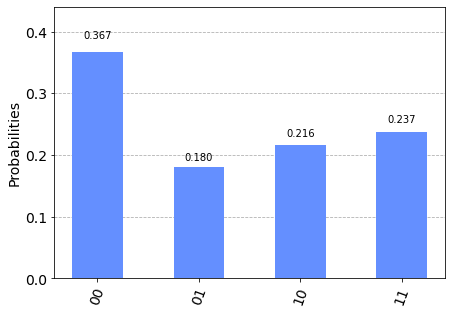

In [19]:
results = job.result()
answer = results.get_counts(mini.circuito)
plot_histogram(answer)

In [20]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and not x.configuration().simulator and x.status().operational==True))
job = qiskit.execute(qclass.circuito, backend=backend, shots=1024, optimization_level=3)
job_monitor(job, interval = 2)

TranspilerError: 'Number of qubits (9) in circuit675 is greater than maximum (5) in the coupling_map'